# Reuirement R1



In [50]:
import numpy as np
import pandas as pd
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import Perceptron
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics.pairwise import rbf_kernel
from sklearn.metrics import accuracy_score,f1_score
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import cross_val_score
from sklearn import metrics
import matplotlib.pyplot as plt
import matplotlib.patheffects as PathEffects
from matplotlib.text import TextPath
from sklearn.manifold import TSNE
from sklearn.svm import SVC
from sklearn.feature_selection import mutual_info_classif
from sklearn.utils import resample


In [51]:
cols_name = ['Id number','RI','Na','Mg','Al','Si','K','Ca','Ba','Fe','Glass_class']
GlassDataset = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/glass/glass.data",names=cols_name)
GlassDataset.head()

,Id number,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Glass_class
0,1,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,2,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,3,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,4,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,5,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


## Checking for missing values and imputing missing values if appropriate

In [52]:
# Checking Missing values
print(GlassDataset.isnull().sum())

Id number      0
RI             0
Na             0
Mg             0
Al             0
Si             0
K              0
Ca             0
Ba             0
Fe             0
Glass_class    0
dtype: int64


In [53]:
# Impute the  missing values
imv = SimpleImputer(missing_values=np.nan,strategy='mean')
imv = imv.fit(GlassDataset.values)
imv_data = imv.transform(GlassDataset.values)
print(imv_data)

[[  1.        1.52101  13.64    ...   0.        0.        1.     ]
 [  2.        1.51761  13.89    ...   0.        0.        1.     ]
 [  3.        1.51618  13.53    ...   0.        0.        1.     ]
 ...
 [212.        1.52065  14.36    ...   1.64      0.        7.     ]
 [213.        1.51651  14.38    ...   1.57      0.        7.     ]
 [214.        1.51711  14.23    ...   1.67      0.        7.     ]]


## Normalizing all feature values

In [54]:
X_feature = GlassDataset.drop('Glass_class', axis=1)
y_target = GlassDataset['Glass_class']



scale = MinMaxScaler(feature_range=(0,1))
f_Scaled = scale.fit_transform(X_feature)
print(f_Scaled)


[[0.         0.43283582 0.43759398 ... 0.30855019 0.         0.        ]
 [0.00469484 0.28358209 0.47518797 ... 0.22304833 0.         0.        ]
 [0.00938967 0.22080773 0.42105263 ... 0.21840149 0.         0.        ]
 ...
 [0.99061033 0.41703248 0.54586466 ... 0.27973978 0.52063492 0.        ]
 [0.99530516 0.23529412 0.54887218 ... 0.28345725 0.4984127  0.        ]
 [1.         0.26163301 0.52631579 ... 0.2964684  0.53015873 0.        ]]


## Apply tsne visualization before and after rbf kernel

In [55]:
def scatter(x, colors):
    palette = np.array(plt.cm.tab10.colors)
    f = plt.figure(figsize=(8, 8))
    ax = plt.subplot(aspect='equal')
    scatter = ax.scatter(x[:, 0], x[:, 1], lw=0, s=30, c=palette[colors.astype(int)])
    ax.axis("off")
    txts = []

    for i in np.unique(colors):
        xtext, ytext = np.median(x[colors == i], axis=0)
        txt = ax.text(xtext, ytext, str(i), fontsize=24, color="white", path_effects=[PathEffects.withStroke(linewidth=3, foreground="black")])
        txts.append(txt)

    return f, ax, scatter, txts

In [56]:
before_tsne = TSNE(n_components=2, random_state=42)
ftsne = before_tsne.fit_transform(f_Scaled)

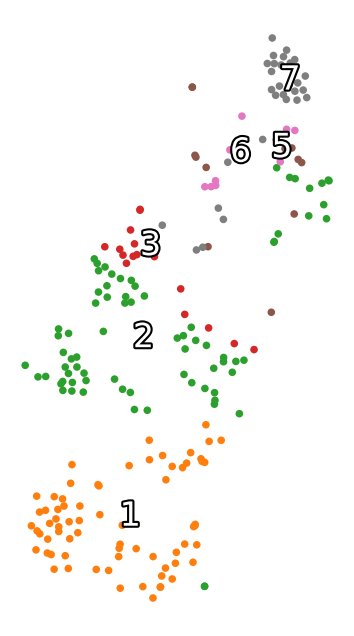

In [57]:
scatter(ftsne,y_target)
plt.show()

4) Apply RBF kernel on Sepration data

In [58]:
gamma_val = 2
rbf_k = rbf_kernel(f_Scaled, gamma=gamma_val)


5) Apply tsne after applying RBF kernel

In [59]:

rbf_tsne = TSNE(n_components=2, random_state=42)
X_tsne = rbf_tsne.fit_transform(rbf_k)

In [60]:
def scatter(x, colors):
    palette = np.array(plt.cm.tab10.colors)
    f = plt.figure(figsize=(8, 8))
    ax = plt.subplot(aspect='equal')
    scatter = ax.scatter(x[:, 0], x[:, 1], lw=0, s=30, c=palette[colors.astype(int)])
    ax.axis("off")
    txts = []

    for i in np.unique(colors):
        xtext, ytext = np.median(x[colors == i], axis=0)
        txt = ax.text(xtext, ytext, str(i), fontsize=24, color="white", path_effects=[PathEffects.withStroke(linewidth=3, foreground="black")])
        txts.append(txt)

    return f, ax, scatter, txts

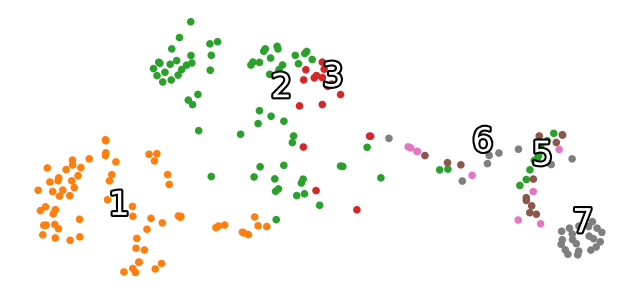

In [61]:
scatter(X_tsne, y_target)
plt.show()

## Apply tsne visualization before and after using rbf kernel particular  on class 1 and class 2

[[0.         0.40679522 0.70460048 ... 0.18331504 0.         0.        ]
 [0.00689655 0.25068871 0.76513317 ... 0.08232711 0.         0.        ]
 [0.0137931  0.18503214 0.6779661  ... 0.07683864 0.         0.        ]
 ...
 [0.9862069  0.22681359 0.5496368  ... 0.12074643 0.         0.        ]
 [0.99310345 0.20431589 0.5472155  ... 0.18990121 0.         0.68571429]
 [1.         0.28650138 0.51331719 ... 0.17563117 0.         1.        ]]


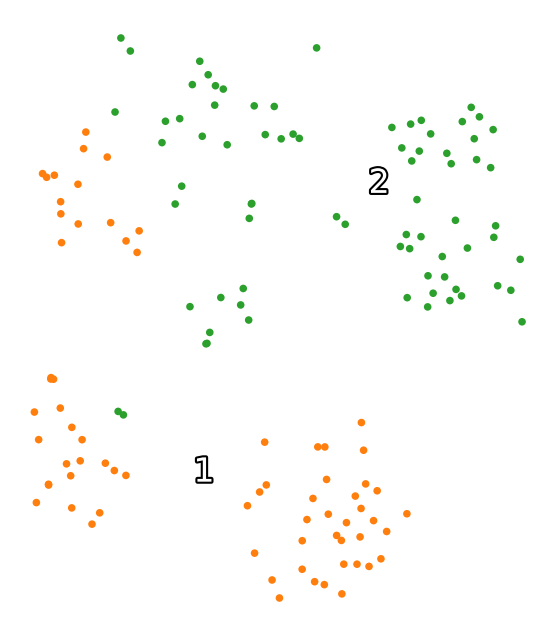

In [62]:
# separte the class 1 and class 2 in type of glasses

seprate = GlassDataset[(GlassDataset['Glass_class'] == 1) | (GlassDataset['Glass_class'] == 2)]
X = seprate.drop('Glass_class', axis=1)
y = seprate['Glass_class']

# apply normalization
sep_scale = MinMaxScaler(feature_range=(0,1))
s_Scaled = sep_scale.fit_transform(X)
print(s_Scaled)



def scatter(x, colors):
    palette = np.array(plt.cm.tab10.colors)
    f = plt.figure(figsize=(8, 8))
    ax = plt.subplot(aspect='equal')
    scatter = ax.scatter(x[:, 0], x[:, 1], lw=0, s=30, c=palette[colors.astype(int)])
    ax.axis("off")
    txts = []

    for i in np.unique(colors):
        xtext, ytext = np.median(x[colors == i], axis=0)
        txt = ax.text(xtext, ytext, str(i), fontsize=24, color="white", path_effects=[PathEffects.withStroke(linewidth=3, foreground="black")])
        txts.append(txt)

    return f, ax, scatter, txts

#apply tsne

sep_tsne = TSNE(n_components=2, random_state=42)
s_tsne = sep_tsne.fit_transform(s_Scaled)

scatter(s_tsne,y)
plt.show()



Apply rbf kernel

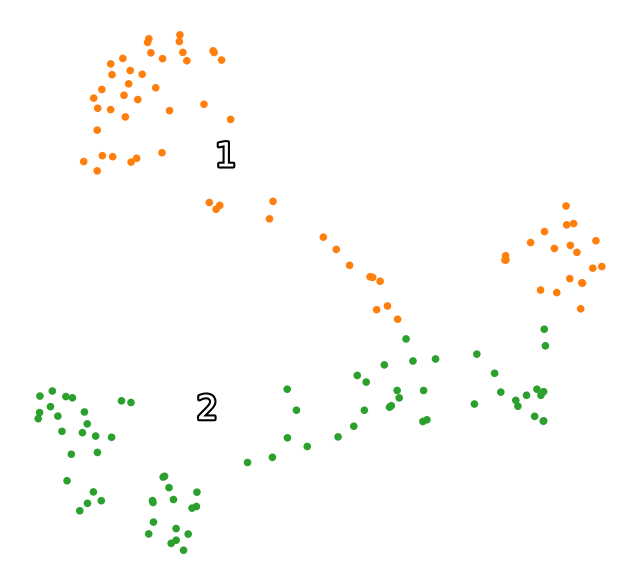

In [63]:

#for gamma_sep_val in range(1,10):
gamma_sep_val= 3
sep_k = rbf_kernel(s_Scaled, gamma=gamma_sep_val)


# Apply visualization
def scatter(x, colors):
    palette = np.array(plt.cm.tab10.colors)
    f = plt.figure(figsize=(8, 8))
    ax = plt.subplot(aspect='equal')
    scatter = ax.scatter(x[:, 0], x[:, 1], lw=0, s=30, c=palette[colors.astype(int)])
    ax.axis("off")
    txts = []

    for i in np.unique(colors):
        xtext, ytext = np.median(x[colors == i], axis=0)
        txt = ax.text(xtext, ytext, str(i), fontsize=24, color="white", path_effects=[PathEffects.withStroke(linewidth=3, foreground="black")])
        txts.append(txt)

    return f, ax, scatter, txts

#Apply tsne
K_tsne = TSNE(n_components=2, random_state=42)
sep_rbf_tsne = K_tsne.fit_transform(sep_k)

scatter(sep_rbf_tsne,y)
plt.show()




# Requirement R2
Generate models as described below in a), b) and c) using repeated cross validation with number of folds=10 and repeats=3. Cross validation is used in preference to the standard train/test split method of training as the dataset is small with only 214 samples. With smaller datasets cross validation gives a more reliable estimate of classifier accuracy.

1) Genrate a Linear Perceptron model on the preposed data **before** the Kernel function

In [64]:
#Apply cross Validation
KCV = RepeatedKFold(n_splits=10,n_repeats=3,random_state=42)
LPC = Perceptron(max_iter=1000,random_state=0,n_iter_no_change=3,tol=0.0001)

per_preds = []
per_tests = []

for train_index,test_index in KCV.split(f_Scaled):
  X_train, X_test = f_Scaled[train_index],f_Scaled[test_index]
  y_train, y_test = y_target.iloc[train_index], y_target.iloc[test_index]



LPC = LPC.fit(X_train,y_train)


In [65]:
#Use model for predication
t_pred = LPC.predict(X_test)

per_preds.extend(t_pred)
per_tests.extend(y_test)


In [66]:

#model Diagnostics
LPC_matrix = metrics.confusion_matrix(y_test,t_pred)
print("Accuracy:",metrics.accuracy_score(y_test, t_pred))
print("Confusion Matrix:")
print(LPC_matrix)

scores = cross_val_score(LPC,X_feature,y_target,scoring='accuracy',cv=KCV)
print("Cross Validation Scores: ", scores)
print("Average CV Score: ", scores.mean())


perceptron_class_val = f1_score(per_tests, per_preds, average=None)
print("F1 Score for each class :")
for i, score in enumerate(perceptron_class_val):
    print(f"Class {i+1}: {score:.4f}")



Accuracy: 0.7619047619047619
Confusion Matrix:
[[5 0 0 0 0 0]
 [2 4 0 0 0 0]
 [0 0 1 0 0 0]
 [0 0 0 0 0 0]
 [0 0 0 0 0 2]
 [0 0 0 1 0 6]]
Cross Validation Scores:  [0.18181818 0.27272727 0.72727273 0.45454545 0.47619048 0.47619048
 0.57142857 0.61904762 0.80952381 0.57142857 0.27272727 0.27272727
 0.68181818 0.40909091 0.66666667 0.38095238 0.47619048 0.52380952
 0.76190476 0.71428571 0.63636364 0.5        0.63636364 0.36363636
 0.66666667 0.52380952 0.61904762 0.66666667 0.85714286 0.66666667]
Average CV Score:  0.5485569985569986
F1 Score for each class :
Class 1: 0.8333
Class 2: 0.8000
Class 3: 1.0000
Class 4: 0.0000
Class 5: 0.0000
Class 6: 0.8000


Genrate a Linear Perceptron model on the preposed data **after** the Kernel function

In [67]:
for gamma_per_val in range(1 ,10):
  per_k = rbf_kernel(f_Scaled, gamma=gamma_per_val)



In [68]:
KCV_k = RepeatedKFold(n_splits=10,n_repeats=3)

LPC_k = Perceptron(max_iter=1000,random_state=0,n_iter_no_change=3,tol=0.0001)
perceptron_preds = []
perceptron_tests = []

for train_p,test_p in KCV.split(per_k):
  X_p_train, X_p_test = per_k[train_p], per_k[test_p]
  y_p_train, y_p_test = y_target.iloc[train_p], y_target.iloc[test_p]



LPC_K = LPC_k.fit(X_p_train,y_p_train)

#Use model for predication
p_pred = LPC_k.predict(X_p_test)

perceptron_preds.extend(p_pred)
perceptron_tests.extend(y_test)





#model Diagnostics
LPC_matrix_k = metrics.confusion_matrix(y_p_test,p_pred)
print("Accuracy:",metrics.accuracy_score(y_p_test, p_pred))
print("Confusion Matrix:")
print(LPC_matrix_k)

scores_k = cross_val_score(LPC_K,X_feature,y_target,scoring='accuracy',cv=KCV_k)
print("Cross Validation Scores: ", scores_k)
print("Average CV Score: ", scores_k.mean())

perceptron_f1 = f1_score(perceptron_tests, perceptron_preds, average=None)
print("F1 Score for each class :")
for i, score in enumerate(perceptron_f1):
    print(f"Class {i+1}: {score:.4f}")



Accuracy: 0.9047619047619048
Confusion Matrix:
[[5 0 0 0 0]
 [0 6 0 0 0]
 [0 0 1 0 0]
 [0 0 0 1 1]
 [0 0 0 1 6]]
Cross Validation Scores:  [0.27272727 0.72727273 0.40909091 0.68181818 0.95238095 0.42857143
 0.23809524 0.47619048 0.61904762 0.80952381 0.63636364 0.77272727
 0.31818182 0.68181818 0.71428571 0.9047619  0.66666667 0.47619048
 0.42857143 0.80952381 0.90909091 0.40909091 0.31818182 0.40909091
 0.85714286 0.66666667 0.61904762 0.47619048 0.71428571 0.57142857]
Average CV Score:  0.5991341991341991
F1 Score for each class :
Class 1: 1.0000
Class 2: 1.0000
Class 3: 1.0000
Class 4: 0.5000
Class 5: 0.8571


1.2) Genrate a logistic regression model on the preposed data **before** the Kernel function

In [69]:
#Apply cross Validation
LG = RepeatedKFold(n_splits=10,n_repeats=3,random_state=42)

LG_m = LogisticRegression(max_iter=1000,C=1,random_state=0,tol=0.001,solver='saga')
log_pred = []
log_test = []

for train_LG,test_LG in LG.split(f_Scaled):
  X_train, X_test = f_Scaled[train_LG], f_Scaled[test_LG]
  y_train, y_test = y_target.iloc[train_LG], y_target.iloc[test_LG]



LG_m = LG_m.fit(X_train,y_train)

In [70]:
#Use model for predication
LG_pred = LG_m.predict(X_test)

log_pred.extend(LG_pred)
log_test.extend(y_test)

In [71]:
#model Diagnostics
LG_matrix = metrics.confusion_matrix(y_test,LG_pred)
print("Accuracy:",metrics.accuracy_score(y_test, LG_pred))
print("Confusion Matrix:")
print(LG_matrix)



LG_scores = cross_val_score(LG_m,X_feature,y_target,scoring='accuracy',cv=LG)
print("Cross Validation Scores: ", LG_scores)
print("Average CV Score: ", LG_scores.mean())


loge_f1 = f1_score(log_test, log_pred, average=None)
print("F1 Score for each class :")
for i, score in enumerate(loge_f1):
    print(f"Class {i+1}: {score:.4f}")

Accuracy: 0.7619047619047619
Confusion Matrix:
[[5 0 0 0 0]
 [1 5 0 0 0]
 [0 1 0 0 0]
 [0 1 0 0 1]
 [0 1 0 0 6]]
Cross Validation Scores:  [0.86363636 1.         1.         0.95454545 1.         0.95238095
 0.9047619  0.95238095 1.         1.         1.         1.
 1.         0.90909091 1.         1.         0.95238095 1.
 0.9047619  0.85714286 0.95454545 0.90909091 1.         0.95454545
 1.         0.95238095 0.95238095 1.         0.95238095 1.        ]
Average CV Score:  0.9642135642135642
F1 Score for each class :
Class 1: 0.9091
Class 2: 0.7143
Class 3: 0.0000
Class 4: 0.0000
Class 5: 0.8571


Genrate a logistic regression model on the preposed data **after** the Kernel function

In [72]:
for gamma_log_val in range(1 ,10):
  log_k = rbf_kernel(f_Scaled, gamma=gamma_log_val)

In [73]:
LG_k = RepeatedKFold(n_splits=10,n_repeats=3,random_state=42)

LG_m_k = LogisticRegression(max_iter=1000,C=1,random_state=0,tol=0.001,solver='saga')

Log_preds = []
Log_tests = []

for train_LG_k,test_LG_k in LG_k.split(log_k):
  X_train, X_test = log_k[train_LG_k],log_k[test_LG_k]
  y_train, y_test = y_target[train_LG_k], y_target[test_LG_k]



LG_m_k = LG_m_k.fit(X_train,y_train)


#Use model for predication
LG_pred_k = LG_m_k.predict(X_test)

Log_preds.extend(LG_pred_k)
Log_tests.extend(y_test)

#model Diagnostics
LG_matrix_k = metrics.confusion_matrix(y_test,LG_pred_k)
print("Accuracy:",metrics.accuracy_score(y_test, LG_pred_k))
print("Confusion Matrix:")
print(LG_matrix_k)



LG_scores_k = cross_val_score(LG_m_k,X_feature,y_target,scoring='accuracy',cv=LG_k)
print("Cross Validation Scores: ", LG_scores_k)
print("Average CV Score: ", LG_scores_k.mean())

log_f1 = f1_score(Log_tests, Log_preds, average=None)
print("F1 Score for each class :")
for i, score in enumerate(log_f1):
    print(f"Class {i+1}: {score:.4f}")




Accuracy: 0.8095238095238095
Confusion Matrix:
[[5 0 0 0 0]
 [0 6 0 0 0]
 [0 0 1 0 0]
 [0 1 0 1 0]
 [0 2 0 1 4]]
Cross Validation Scores:  [0.86363636 1.         1.         0.95454545 1.         0.95238095
 0.9047619  0.95238095 1.         1.         1.         1.
 1.         0.90909091 1.         1.         0.95238095 1.
 0.9047619  0.85714286 0.95454545 0.90909091 1.         0.95454545
 1.         0.95238095 0.95238095 1.         0.95238095 1.        ]
Average CV Score:  0.9642135642135642
F1 Score for each class :
Class 1: 1.0000
Class 2: 0.8000
Class 3: 1.0000
Class 4: 0.5000
Class 5: 0.7273


3)Multilayer Perceptron


In [74]:
MP_fold = RepeatedKFold(n_splits=10,n_repeats=3,random_state=42)
MP= MLPClassifier(max_iter=1000,random_state=1,n_iter_no_change=3,tol=0.0001)


Mul_preds = []
Mul_tests = []

for MP_index,MP_test in MP_fold.split(f_Scaled):
  X_train, X_test = f_Scaled[MP_index],f_Scaled[MP_test]
  y_train, y_test = y_target[MP_index], y_target[MP_test]



MP= MP.fit(X_train,y_train)


#Use model for predication
MP_pred = MP.predict(X_test)

Mul_preds.extend(MP_pred)
Mul_tests.extend(y_test)


#model Diagnostics
MP_matrix = metrics.confusion_matrix(y_test,MP_pred)
print("Accuracy:",metrics.accuracy_score(y_test, MP_pred))
print("Confusion Matrix:")
print(MP_matrix)


MP_scores = cross_val_score(MP,X_feature,y_target,scoring='accuracy',cv=MP_fold)
print("Cross Validation Scores: ", MP_scores)
print("Average CV Score: ", MP_scores.mean())


Mul_f1 = f1_score(Mul_tests, Mul_preds, average=None)
print("F1 Score for each class :")
for i, score in enumerate(Mul_f1):
    print(f"Class {i+1}: {score:.4f}")


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


Accuracy: 0.9523809523809523
Confusion Matrix:
[[5 0 0 0 0]
 [0 6 0 0 0]
 [0 0 1 0 0]
 [0 0 0 2 0]
 [0 0 1 0 6]]
Cross Validation Scores:  [1.         1.         1.         1.         1.         1.
 0.95238095 1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         0.95238095
 0.95238095 0.95238095 1.         0.95454545 1.         1.
 1.         1.         1.         0.95238095 1.         1.        ]
Average CV Score:  0.9905483405483405
F1 Score for each class :
Class 1: 1.0000
Class 2: 1.0000
Class 3: 0.6667
Class 4: 1.0000
Class 5: 0.9231


# Requirement R3:



Apply the train/test partition to the pre-processed data (including the application of the RBF Kernal). Use a 70/30 split.


In [75]:
f_train,f_test,t_train,t_test = train_test_split(rbf_k,y_target,test_size=0.3,random_state=0)


In [76]:
#  use Resample method to double the size of traing data

f_train_re = resample(f_train,replace=True,n_samples=len(f_train)*2,random_state=42)
t_train_re = resample(t_train,replace=True,n_samples=len(t_train)*2,random_state=42)

In [77]:
# Apply new training set on Linear perceptron model

per = Perceptron(max_iter=1000,random_state=0,n_iter_no_change=3,tol=0.0001)
per = per.fit(f_train_re,t_train_re)

per_pred = per.predict(f_test)

per_matrix = metrics.confusion_matrix(t_test,per_pred)
print("Accuracy:",metrics.accuracy_score(t_test, per_pred))
print("Confusion Matrix:")
print(per_matrix)

per_f1 = f1_score(t_test, per_pred,average=None)
print("F1 Score for each class :")
for i, score in enumerate(per_f1):
    print(f"Class {i+1}: {score:.4f}")



Accuracy: 0.7692307692307693
Confusion Matrix:
[[21  0  0  0  0  0]
 [ 4 20  0  1  0  1]
 [ 0  5  1  1  0  0]
 [ 0  0  0  1  0  1]
 [ 0  0  1  0  0  1]
 [ 0  0  0  0  0  7]]
F1 Score for each class :
Class 1: 0.9130
Class 2: 0.7843
Class 3: 0.2222
Class 4: 0.4000
Class 5: 0.0000
Class 6: 0.8235


In [78]:
# Apply on logistic regression

logi = LogisticRegression(max_iter=1000,random_state=0,tol=0.0001)
logi = logi.fit(f_train_re,t_train_re)

logi_pred = logi.predict(f_test)

logi_matrix = metrics.confusion_matrix(t_test,logi_pred)
print("Accuracy:",metrics.accuracy_score(t_test, logi_pred))
print("Confusion Matrix:")
print(logi_matrix)

logi_f1 = f1_score(t_test, logi_pred,average=None)
print("F1 Score for each class :")
for i_log, score_log in enumerate(logi_f1):
    print(f"Class {i_log+1}: {score_log:.4f}")

Accuracy: 0.9230769230769231
Confusion Matrix:
[[21  0  0  0  0  0]
 [ 1 24  0  0  0  1]
 [ 0  1  6  0  0  0]
 [ 0  0  0  1  0  1]
 [ 0  0  0  0  1  1]
 [ 0  0  0  0  0  7]]
F1 Score for each class :
Class 1: 0.9767
Class 2: 0.9412
Class 3: 0.9231
Class 4: 0.6667
Class 5: 0.6667
Class 6: 0.8235


#Requirement R4

In [79]:
info_gain = mutual_info_classif(f_train,t_train)



In [80]:
#cols = ['RI','Na','Mg','Al','Si','K','Ca','Ba','Fe']
X_feature = GlassDataset.drop(['Id number','Glass_class'], axis=1)
cols = X_feature.columns.tolist()

In [81]:
# Create a dictionary to store the feature and its information gain
ig_dict = {}
for i in range(len(cols)):
    ig_dict[cols[i]] = info_gain[i]

In [82]:
info_gain_sorted = dict(sorted(ig_dict.items(), key=lambda item: item[1], reverse=True))
for feature, value in info_gain_sorted.items():
    print(f"{feature}: {value:.4f}")





RI: 0.9710
Fe: 0.8249
Al: 0.7988
Na: 0.7724
Ba: 0.7506
Si: 0.7466
Ca: 0.7306
K: 0.7075
Mg: 0.6856


Now drop these features and regenerate the model and display the F values for each of the classes.


Apply new data on Linear Perceptron Model

In [83]:
least_significant_features = [8,9]  # Replace with actual feature indices
# Drop the least significant features
X_train_reduced = np.delete(f_train, least_significant_features, axis=1)
X_test_reduced = np.delete(f_test, least_significant_features, axis=1)


In [84]:

best_model = Perceptron(max_iter=1000, random_state=42, tol=1e-3)
best_model.fit(X_train_reduced, t_train)

y_pred_reduced = best_model.predict(X_test_reduced)


f1_per_class_reduced = f1_score(t_test, y_pred_reduced, average=None)



In [85]:

print("F1 Score for each class (after dropping least significant features):")
for i, score in enumerate(f1_per_class_reduced):
    print(f"Class {i+1}: {score:.4f}")


F1 Score for each class (after dropping least significant features):
Class 1: 0.8936
Class 2: 0.8077
Class 3: 0.4444
Class 4: 1.0000
Class 5: 1.0000
Class 6: 1.0000


Apply new data on Logistic Regression

In [86]:
log_model = LogisticRegression(max_iter=1000, random_state=42, tol=1e-3)
log_model.fit(X_train_reduced, t_train)

# Step 6: Predict and evaluate using F1 score for each class
log_pred_reduced = log_model.predict(X_test_reduced)

# Step 7: Calculate F1 score for each class
log_per_class_reduced = f1_score(t_test, log_pred_reduced, average=None)

In [87]:
print("F1 Score for each class (after dropping least significant features):")
for i_log, score_log in enumerate(log_per_class_reduced):
    print(f"Class {i_log+1}: {score_log:.4f}")

F1 Score for each class (after dropping least significant features):
Class 1: 0.9767
Class 2: 0.9412
Class 3: 0.9231
Class 4: 0.8000
Class 5: 0.6667
Class 6: 0.9333
